# Lecture 11 (4/20/2022)

**Announcements**
- Problem set 3 coming out today, will be due *next Wednesday* 4/27


*Last time we covered:*
- Data cleaning with python (duplicates, missing data, outliers)

**Today's agenda:**
- *Wide* versus *long* data


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Wide and Long Data

> "Like families, tidy datasets are all alike but every messy dataset is messy in its own way."
~ Hadley Wickham

## What is *wide* data?

...

When we interact with data that's made to be read by people, it's most often in *wide* format. 

The definition of wide data can be a little hard to pin down but one rule of thumb is that *wide* data spreads multiple observations or variables across columns in a given row.

| y | x1 | x2 | x3 |
| -- | -- | -- | -- |
| 1 | a | b | c |
| 2 | d | e | f |
| ... | ... | ... | ... |

Here's some data I made up about average temperatures in five US cities over three consecutive years:

In [2]:
cities = pd.DataFrame({
    "City": ["San Diego", "Denver", "New York City", "Los Angeles", "San Francisco"],
    "2010": [75, 60, 55, 65, 70],
    "2011": [77, 63, 58, 67, 72],
    "2012": [77, 62, 56, 67, 71]
})

cities

,City,2010,2011,2012
0,San Diego,75,77,77
1,Denver,60,63,62
2,New York City,55,58,56
3,Los Angeles,65,67,67
4,San Francisco,70,72,71


This data can also be presented with *year* as our variable of interest and each city as a column:

In [3]:
years = pd.DataFrame({
    "Year": [2010, 2011, 2012],
    "San Diego": [75, 77, 77],
    "Denver": [60, 63, 62],
    "New York City": [55, 58, 56],
    "Los Angeles": [65, 67, 67],
    "San Francisco": [70, 72, 71]
})

years

,Year,San Diego,Denver,New York City,Los Angeles,San Francisco
0,2010,75,60,55,65,70
1,2011,77,63,58,67,72
2,2012,77,62,56,67,71


Both of these are pretty easy to read and pretty intuitive. 

**What kind of questions can we answer most easily with each dataframe?**

`cities`: 
    
`years`: 



Note: this is easiest to illustrate with *time sequence* data, but most data can be toggled around this way to some degree:

In [4]:
students = pd.DataFrame({
    "Student": ["Erik", "Amanda", "Maia"],
    "Math": [90, 95, 80],
    "Writing": [90, 85, 95]
})

students

,Student,Math,Writing
0,Erik,90,90
1,Amanda,95,85
2,Maia,80,95


In [5]:
classes = pd.DataFrame({
    "Subject": ["Math", "Writing"],
    "Erik": [80, 95],
    "Amanda": [95, 85],
    "Maia": [80, 95]
})

classes

,Subject,Erik,Amanda,Maia
0,Math,80,95,80
1,Writing,95,85,95


The first table makes it easier to ask questions like "which student performed best?", while the second is easier for asking questions like "are these students better at math or writing?"

**Self-quiz:** do the above examples give you an okay intuition for what *wide* data looks like?

## So what's the problem?

1. First, the exercise above suggests that for different kinds of questions, we need to format our data in different ways. That seems onerous...

2. Second, even though tables like this make these data easy to read as humans, answering questions about the data when it's formatted like this can be difficult and inefficient. 

*Using the data below, how do we figure out which city was hottest on average (using our python skills)?*

In [6]:
cities

,City,2010,2011,2012
0,San Diego,75,77,77
1,Denver,60,63,62
2,New York City,55,58,56
3,Los Angeles,65,67,67
4,San Francisco,70,72,71


In [7]:
# CODE HERE



Notice that we have to do this by calculating an average row by row. Seems inefficient.

Can we do any better with our `years` dataframe?

In [8]:
years

,Year,San Diego,Denver,New York City,Los Angeles,San Francisco
0,2010,75,60,55,65,70
1,2011,77,63,58,67,72
2,2012,77,62,56,67,71


In [9]:
# CODE HERE



*Using the data below, how do we decide which year had the highest recorded temperature across these cities?*

In [10]:
years

,Year,San Diego,Denver,New York City,Los Angeles,San Francisco
0,2010,75,60,55,65,70
1,2011,77,63,58,67,72
2,2012,77,62,56,67,71


In [11]:
# CODE HERE



Yikes 😬

**Self-quiz:** is it clear how data that's easy to read in wide format can be kind of tricky to interact with when trying to analyze it in python?

## What do we do about this? Answer: tidy (long) data!

With *long* or *tidy* data, every observation gets its own row, with columns indicating the variable values that correpond to that observation.

The *wide* table at the beginning of the previous section looked like this:

| y | x1 | x2 | x3 |
| -- | -- | -- | -- |
| 1 | a | b | c |
| 2 | d | e | f |
| ... | ... | ... | ... |

Compare the table above to this one:

| y | variable | value |
| -- | -- | -- |
| 1 | x1 | a |
| 1 | x2 | b |
| 1 | x3 | c | 
| 2 | x1 | d | 
| 2 | x2 | e | 
| 2 | x3 | f | 
| ... | ... | ... |

Here's a concrete example with the student data above. 

In wide form, it looked like this:

In [12]:
students

,Student,Math,Writing
0,Erik,90,90
1,Amanda,95,85
2,Maia,80,95


In *tidy* form, it looks like this:


In [13]:
tidy_students = pd.DataFrame({
    "Student": ["Erik", "Erik", "Amanda", "Amanda", "Maia", "Maia"],
    "Subject": ["Math", "Writing", "Math", "Writing", "Math", "Writing"],
    "Score": [90, 90, 95, 85, 80, 95]
})

tidy_students

,Student,Subject,Score
0,Erik,Math,90
1,Erik,Writing,90
2,Amanda,Math,95
3,Amanda,Writing,85
4,Maia,Math,80
5,Maia,Writing,95


**Self-quiz:** is it clear how the *tidy* data here differs from *wide* data?

If you want to go into the weeds on this, [here's](https://www.jstatsoft.org/article/view/v059i10) a paper by the inventor of `tidyverse`, a large library in R with many similar functions to `pandas`. 

## So what does *tidy* data do for us?

The tidy data in the previous examples are harder to read and harder to interpret in the ways we often want to think about tabular data. 

*So how does this help us?*

**Summary**
- Tidy data avoids the pitfalls of having to reformat our data for different kinds of questions (usually)
- Tidy data enforces structure so there isn't confusion about how best to represent our data (there may be multiple wide formats but usually only one tidy format) -> *best practice*
- Tidy data is easier to interact with and analyze with code
- Tidy data lets us take advantage of the *vectorization* that numpy, pandas, and other modern coding languages employ to make calculations super speedy

**Example**

Let's go through a simple example with the temperature data above. 

Here's the original wide dataframe:

In [14]:
cities

,City,2010,2011,2012
0,San Diego,75,77,77
1,Denver,60,63,62
2,New York City,55,58,56
3,Los Angeles,65,67,67
4,San Francisco,70,72,71


Here it is in tidy format:

In [15]:
tidy_cities = pd.DataFrame({
    "City": ["San Diego", "San Diego", "San Diego", 
             "Denver", "Denver", "Denver", 
             "New York City", "New York City", "New York City", 
             "Los Angeles", "Los Angeles", "Los Angeles", 
             "San Francisco", "San Francisco", "San Francisco"
            ],
    "Year": [2010, 2011, 2012, 
             2010, 2011, 2012, 
             2010, 2011, 2012, 
             2010, 2011, 2012, 
             2010, 2011, 2012
            ],
    "Temp": [75, 77, 77,
             60, 63, 62,
             55, 58, 56,
             65, 67, 67,
             70, 72, 71
            ]
})

tidy_cities

,City,Year,Temp
0,San Diego,2010,75
1,San Diego,2011,77
2,San Diego,2012,77
3,Denver,2010,60
4,Denver,2011,63
5,Denver,2012,62
6,New York City,2010,55
7,New York City,2011,58
8,New York City,2012,56
9,Los Angeles,2010,65


Now, let's return to our original question: *which city was the hottest on average during this time?*

In [16]:
# CODE HERE



That was pretty easy. 

And under the hood, pandas `groupby` means that we compute the average temperature using vectorization rather than calculating row by row as we did in the solution above. 


What about our second question: *which year had the highest recorded temperature?*

In [17]:
# CODE HERE



Okay, that was also pretty easy.

So, this is far from an exhaustive survey of wide versus tidy/long data, but should give you a flavor for why this distinction is useful.

**Self-quiz:** do the examples above make it pretty clear why tidy data makes our lives simpler, clearer, and easier for coding / analysis?

## Pandas helps you convert data easily

Lots of data in the real world comes in wide form or requires some re-shuffling to get into tidy format.

If you're working with a dataset that isn't in tidy form, it's almost always a good first step. 

We'll quickly review the tools that `pandas` has for toggling data formats.

Much more info about this [here](https://pandas.pydata.org/pandas-docs/stable/user_guide/reshaping.html#).


### Converting from wide to long with `melt`

First, let's turn to a familiar dataset: the `gapminder` data.

*Is this data in tidy form?*

In [18]:
gap = pd.read_csv("https://raw.githubusercontent.com/UCSD-CSS-002/ucsd-css-002.github.io/master/datasets/gapminder.csv")

gap
# gap.shape # note the size. Things are about to change...

,Unnamed: 0,country,continent,year,lifeExp,pop,gdpPercap
0,1,Afghanistan,Asia,1952,28.801,8425333,779.445314
1,2,Afghanistan,Asia,1957,30.332,9240934,820.853030
2,3,Afghanistan,Asia,1962,31.997,10267083,853.100710
3,4,Afghanistan,Asia,1967,34.020,11537966,836.197138
4,5,Afghanistan,Asia,1972,36.088,13079460,739.981106
...,...,...,...,...,...,...,...
1699,1700,Zimbabwe,Africa,1987,62.351,9216418,706.157306
1700,1701,Zimbabwe,Africa,1992,60.377,10704340,693.420786
1701,1702,Zimbabwe,Africa,1997,46.809,11404948,792.449960
1702,1703,Zimbabwe,Africa,2002,39.989,11926563,672.038623


Let's move the "observations" (`lifeExp`, `pop`, and `gdpPercap`) to their own rows using [`melt`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.melt.html#pandas.melt):

In [19]:
gap_tidy = gap.melt(
    id_vars = ["Unnamed: 0", "country", "continent", "year"], # columns to keep in each row
    value_vars = ["lifeExp", "pop", "gdpPercap"], # columns to be moved into their own rows
    var_name = "measure", # name of the column that will store the "value_vars" column names
    value_name = "value" # name of the column that will store the "value_vars" column values
)

gap_tidy # take a look at the data. Is this what you expected?

# gap_tidy.shape # note how many rows we added with this

,Unnamed: 0,country,continent,year,measure,value
0,1,Afghanistan,Asia,1952,lifeExp,28.801000
1,2,Afghanistan,Asia,1957,lifeExp,30.332000
2,3,Afghanistan,Asia,1962,lifeExp,31.997000
3,4,Afghanistan,Asia,1967,lifeExp,34.020000
4,5,Afghanistan,Asia,1972,lifeExp,36.088000
...,...,...,...,...,...,...
5107,1700,Zimbabwe,Africa,1987,gdpPercap,706.157306
5108,1701,Zimbabwe,Africa,1992,gdpPercap,693.420786
5109,1702,Zimbabwe,Africa,1997,gdpPercap,792.449960
5110,1703,Zimbabwe,Africa,2002,gdpPercap,672.038623


What can we do with this?

Quick example! 

(think about how we would do the below with our data in wide format)

In [20]:
gap_tidy.groupby(
    ['country', 'measure']
)['value'].mean().reset_index()

,country,measure,value
0,Afghanistan,gdpPercap,8.026746e+02
1,Afghanistan,lifeExp,3.747883e+01
2,Afghanistan,pop,1.582372e+07
3,Albania,gdpPercap,3.255367e+03
4,Albania,lifeExp,6.843292e+01
...,...,...,...
421,Zambia,lifeExp,4.599633e+01
422,Zambia,pop,6.353805e+06
423,Zimbabwe,gdpPercap,6.358580e+02
424,Zimbabwe,lifeExp,5.266317e+01


### Converting from long to wide with `pivot`

But wait! I thought we wanted our data in tidy format???

The [`pivot`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.pivot.html) function makes it easy for us to convert to wide format when it's convenient. 

In [21]:
gap_wide = gap_tidy.pivot(
    index = "year", # column to be treated as the index
    columns = ["measure", "country"], # columns to be spread out into their own columns for each value
    values = "value" # value to be inserted in each new column
)

gap_wide
# gap_wide.shape # this is super condensed

measure     lifeExp                                                      \
country Afghanistan Albania Algeria  Angola Argentina Australia Austria   
year                                                                      
1952         28.801  55.230  43.077  30.015    62.485    69.120  66.800   
1957         30.332  59.280  45.685  31.999    64.399    70.330  67.480   
1962         31.997  64.820  48.303  34.000    65.142    70.930  69.540   
1967         34.020  66.220  51.407  35.985    65.634    71.100  70.140   
1972         36.088  67.690  54.518  37.928    67.065    71.930  70.630   
1977         38.438  68.930  58.014  39.483    68.481    73.490  72.170   
1982         39.854  70.420  61.368  39.942    69.942    74.740  73.180   
1987         40.822  72.000  65.799  39.906    70.774    76.320  74.940   
1992         41.674  71.581  67.744  40.647    71.868    77.560  76.040   
1997         41.763  72.950  69.152  40.963    73.275    78.830  77.510   
2002         42.129  75.651  70.994  41.003    74.340    80.370  78.980   
2007         43.828  76.423  72.301  42.731    75.320    81.235  79.829   

measure                             ...    gdpPercap                 \
country Bahrain Bangladesh Belgium  ...       Uganda United Kingdom   
year                                ...                               
1952     50.939     37.484  68.000  ...   734.753484    9979.508487   
1957     53.832     39.348  69.240  ...   774.371069   11283.177950   
1962     56.923     41.216  70.250  ...   767.271740   12477.177070   
1967     59.923     43.453  70.940  ...   908.918522   14142.850890   
1972     63.300     45.252  71.440  ...   950.735869   15895.116410   
1977     65.593     46.923  72.800  ...   843.733137   17428.748460   
1982     69.052     50.009  73.930  ...   682.266227   18232.424520   
1987     70.750     52.819  75.350  ...   617.724406   21664.787670   
1992     72.601     56.018  76.460  ...   644.170797   22705.092540   
1997     73.925     59.412  77.530  ...   816.559081   26074.531360   
2002     74.795     62.013  78.320  ...   927.721002   29478.999190   
2007     75.635     64.062  79.441  ...  1056.380121   33203.261280   

measure                                                         \
country United States       Uruguay     Venezuela      Vietnam   
year                                                             
1952      13990.48208   5716.766744   7689.799761   605.066492   
1957      14847.12712   6150.772969   9802.466526   676.285448   
1962      16173.14586   5603.357717   8422.974165   772.049160   
1967      19530.36557   5444.619620   9541.474188   637.123289   
1972      21806.03594   5703.408898  10505.259660   699.501644   
1977      24072.63213   6504.339663  13143.950950   713.537120   
1982      25009.55914   6920.223051  11152.410110   707.235786   
1987      29884.35041   7452.398969   9883.584648   820.799445   
1992      32003.93224   8137.004775  10733.926310   989.023149   
1997      35767.43303   9230.240708  10165.495180  1385.896769   
2002      39097.09955   7727.002004   8605.047831  1764.456677   
2007      42951.65309  10611.462990  11415.805690  2441.576404   

measure                                                           
country West Bank and Gaza  Yemen, Rep.       Zambia    Zimbabwe  
year                                                              
1952           1515.592329   781.717576  1147.388831  406.884115  
1957           1827.067742   804.830455  1311.956766  518.764268  
1962           2198.956312   825.623201  1452.725766  527.272182  
1967           2649.715007   862.442146  1777.077318  569.795071  
1972           3133.409277  1265.047031  1773.498265  799.362176  
1977           3682.831494  1829.765177  1588.688299  685.587682  
1982           4336.032082  1977.557010  1408.678565  788.855041  
1987           5107.197384  1971.741538  1213.315116  706.157306  
1992           6017.654756  1879.496673  1210.884633  693.420786  
1997         

In [22]:
# We access data in the above by making our way down the hierarchical columns
gap_wide.columns

gap_wide['lifeExp']['Australia'][2002]

80.37

Text(0.5, 1.0, 'Income and life expectancy in the US')

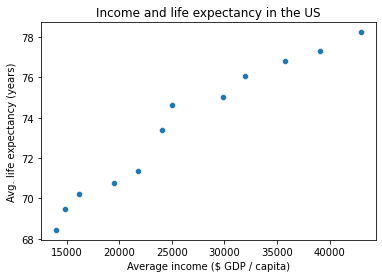

In [23]:
# This can make things like plotting this data a little easier (no need to filter ahead of time)
g = sns.scatterplot(x = gap_wide['gdpPercap']['United States'],
                    y = gap_wide['lifeExp']['United States']
                   )

g.set_xlabel("Average income ($ GDP / capita)")
g.set_ylabel("Avg. life expectancy (years)")
g.set_title("Income and life expectancy in the US")

## Bonus: `stack` and `unstack`

A really clear overview [here](https://pandas.pydata.org/pandas-docs/stable/user_guide/reshaping.html#reshaping-by-stacking-and-unstacking)



In [24]:
gap_stack = gap_wide.stack("country")

gap_stack
# gap_stack.columns

measure                    gdpPercap  lifeExp         pop
year country                                             
1952 Afghanistan          779.445314   28.801   8425333.0
     Albania             1601.056136   55.230   1282697.0
     Algeria             2449.008185   43.077   9279525.0
     Angola              3520.610273   30.015   4232095.0
     Argentina           5911.315053   62.485  17876956.0
...                              ...      ...         ...
2007 Vietnam             2441.576404   74.249  85262356.0
     West Bank and Gaza  3025.349798   73.422   4018332.0
     Yemen, Rep.         2280.769906   62.698  22211743.0
     Zambia              1271.211593   42.384  11746035.0
     Zimbabwe             469.709298   43.487  12311143.0

[1704 rows x 3 columns]

In [25]:
# gap_stack['pop']
# gap_stack[gap_stack['year'] == 2007]

In [26]:
gap_unstack = gap_stack.unstack("year")
gap_unstack

measure               gdpPercap                                         \
year                       1952         1957         1962         1967   
country                                                                  
Afghanistan          779.445314   820.853030   853.100710   836.197138   
Albania             1601.056136  1942.284244  2312.888958  2760.196931   
Algeria             2449.008185  3013.976023  2550.816880  3246.991771   
Angola              3520.610273  3827.940465  4269.276742  5522.776375   
Argentina           5911.315053  6856.856212  7133.166023  8052.953021   
...                         ...          ...          ...          ...   
Vietnam              605.066492   676.285448   772.049160   637.123289   
West Bank and Gaza  1515.592329  1827.067742  2198.956312  2649.715007   
Yemen, Rep.          781.717576   804.830455   825.623201   862.442146   
Zambia              1147.388831  1311.956766  1452.725766  1777.077318   
Zimbabwe             406.884115   518.764268   527.272182   569.795071   

measure                                                                  \
year                       1972          1977         1982         1987   
country                                                                   
Afghanistan          739.981106    786.113360   978.011439   852.395945   
Albania             3313.422188   3533.003910  3630.880722  3738.932735   
Algeria             4182.663766   4910.416756  5745.160213  5681.358539   
Angola              5473.288005   3008.647355  2756.953672  2430.208311   
Argentina           9443.038526  10079.026740  8997.897412  9139.671389   
...                         ...           ...          ...          ...   
Vietnam              699.501644    713.537120   707.235786   820.799445   
West Bank and Gaza  3133.409277   3682.831494  4336.032082  5107.197384   
Yemen, Rep.         1265.047031   1829.765177  1977.557010  1971.741538   
Zambia              1773.498265   1588.688299  1408.678565  1213.315116   
Zimbabwe             799.362176    685.587682   788.855041   706.157306   

measure                                        ...         pop              \
year                       1992          1997  ...        1962        1967   
country                                        ...                           
Afghanistan          649.341395    635.341351  ...  10267083.0  11537966.0   
Albania             2497.437901   3193.054604  ...   1728137.0   1984060.0   
Algeria             5023.216647   4797.295051  ...  11000948.0  12760499.0   
Angola              2627.845685   2277.140884  ...   4826015.0   5247469.0   
Argentina           9308.418710  10967.281950  ...  21283783.0  22934225.0   
...                         ...           ...  ...         ...         ...   
Vietnam              989.023149   1385.896769  ...  33796140.0  39463910.0   
West Bank and Gaza  6017.654756   7110.667619  ...   1133134.0   1142636.0   
Yemen, Rep.         1879.496673   2117.484526  ...   6120081.0   6740785.0   
Zambia              1210.884633   1071.353818  ...   3421000.0   3900000.0   
Zimbabwe             693.420786    792.449960  ...   4277736.0   4995432.0   

measure                                                             \
year                      1972        1977        1982        1987   
country                                                              
Afghanistan         13079460.0  14880372.0  12881816.0  13867957.0   
Albania              2263554.0   2509048.0   2780097.0   3075321.0   
Algeria             14760787.0  17152804.0  20033753.0  23254956.0   
Angola               5894858.0   6162675.0   7016384.0   7874230.0   
Argentina           24779799.0  26983828.0  29341374.0  31620918.0   
...                        ...         ...         ...         ...   
Vietnam             44655014.0  50533506.0  56142181.0  62826491.0   
West Bank and Gaza   1089572.0   1261091.0   1425876.0   1691210.0   
Yemen, Rep.          7407075.0   8403990.0   9657